In [1]:
# %load_ext autoreload
# %autoreload 2

# Experiments with TEASER-S model

In [2]:
from pathlib import Path
import numpy as np

import teaser.util as util
import teaser.evaluation as evaluation

from teaser.algorithm.teaser_s import TEASER_S

## Datasets

In [3]:
## Uncomment corresponding directory.
# DATA_DIR = Path('../../data/Publiq/')
# DATA_DIR = Path('../../data/ML20M/')
DATA_DIR = Path('../../data/Amazon Video Games/')

In [4]:
# Shouldn't need to change this info
INTERACTIONS_TRAIN_PATH = DATA_DIR / 'interactions.train.csv'
INTERACTIONS_VALIN_PATH = DATA_DIR / 'interactions.valin.csv'
INTERACTIONS_VALOUT_PATH = DATA_DIR / 'interactions.valout.csv'
INTERACTIONS_TESTIN_PATH = DATA_DIR / 'interactions.testin.csv'
INTERACTIONS_TESTOUT_PATH = DATA_DIR / 'interactions.testout.csv'

METADATA_PATH = DATA_DIR / 'features.csv'

ITEM_ID = 'itemId'
USER_ID = 'userId'

## Define algorithm and hyperparameter ranges

In [5]:
ALG = TEASER_S

# L2_1 = [10 ** p for p in range(2, 8)]
# L2_2 = [10 ** p for p in range(2, 9)]

L2_1 = [500, 1000, 1500]
L2_2 = [1000, 2000, 5000, 10000]
# RHO = 0
RHO = [10, 100, 10000]
DELTA = 0
MAX_ITER = 15
HYPERPARAMS = {'l2_1': L2_1, 'l2_2': L2_2, 'rho': RHO, 'delta': DELTA,'max_iterations': MAX_ITER}
HYPERPARAMS

{'l2_1': [500, 1000, 1500],
 'l2_2': [1000, 2000, 5000, 10000],
 'rho': [10, 100, 10000],
 'delta': 0,
 'max_iterations': 15}

## Parse data

In [6]:
S, tags = util.parse_metadata(METADATA_PATH, item_id=ITEM_ID)
n, t = S.shape  # amount of items and tags

X = util.parse_interactions(INTERACTIONS_TRAIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

Xval_in = util.parse_interactions(INTERACTIONS_VALIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xval_out = util.parse_interactions(INTERACTIONS_VALOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_in = util.parse_interactions(INTERACTIONS_TESTIN_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)
Xtest_out = util.parse_interactions(INTERACTIONS_TESTOUT_PATH, item_id=ITEM_ID, user_id=USER_ID, shape_items=n)

In [7]:
# # debug
# d_items = 1000
# S = S[:d_items,:]
# tags = tags[:d_items]
# X = X[:,:d_items]
# Xval_in = Xval_in[:,:d_items]
# Xval_out = Xval_out[:,:d_items]
# Xtest_in = Xtest_in[:,:d_items]
# Xtest_out = Xtest_out[:,:d_items]

## Perform gridsearch on validation set

In [8]:
# Precomput XTX and decomposition of XTX, since it's needed for all hyperparameters combinations and doesn't change
XTX = (X.T @ X).toarray()
p, U = np.linalg.eigh(XTX)
fit_params = {'XTX': XTX, 'p': p, 'U': U}

In [9]:
score, best_hyperparams = evaluation.gridsearch(ALG, X, S, Xval_in, Xval_out, HYPERPARAMS, fit_params=fit_params)

Training model TEASER_S with hyperparameters {'l2_1': 500, 'l2_2': 1000, 'rho': 10, 'delta': 0, 'max_iterations': 15}
Decompose DTD


norm E 0.2629349475529069
diag norm: 0.8620496868368023
diag_diff: 2.131010387262923

norm E 0.2534124826184979
diag norm: 0.7316324479215428
diag_diff: 2.079967322029402
rho * change E: 0.6894319551254994

norm E 0.25225486139103126
diag norm: 0.7100492187219295
diag_diff: 2.0322980987266566
rho * change E: 0.16885821050962185

norm E 0.2516099836308079
diag norm: 0.7025550419974199
diag_diff: 1.9866457217463216
rho * change E: 0.05729439319989336

norm E 0.25100244232941715
diag norm: 0.697609165788411
diag_diff: 1.942422289846009
rho * change E: 0.02398586336575402

norm E 0.25040218344101894
diag norm: 0.6933035085134179
diag_diff: 1.899428058836261
rho * change E: 0.013015853187246051

norm E 0.24980885316031104
diag norm: 0.6892157476342142
diag_diff: 1.8575786361795863
rho * change E: 0.009698771795043476

norm E 0.2492229596787868
diag norm: 0.6852269215462866
diag_diff: 1.81682666481334
rho * change E: 0.008791777296421143

norm E 0.24864455926283263
diag norm: 0.6812963717882

norm E 0.16073415718559567
diag norm: 0.4377652682883149
diag_diff: 0.9703553268407588

norm E 0.15848125548401024
diag norm: 0.3940313173981325
diag_diff: 0.9603355978912024
rho * change E: 0.3320548409868567

norm E 0.15834679206771188
diag norm: 0.3880930937428521
diag_diff: 0.9507986225691114
rho * change E: 0.08194565535615074

norm E 0.15823648083476555
diag norm: 0.38625055417105497
diag_diff: 0.941521312508887
rho * change E: 0.02737783192439868

norm E 0.15809227242697876
diag norm: 0.3849715488471421
diag_diff: 0.9323995883296092
rho * change E: 0.011053596576199962

norm E 0.15793464414626854
diag norm: 0.3837859177238108
diag_diff: 0.9234002134184973
rho * change E: 0.005379172056552786

norm E 0.15777286811839067
diag norm: 0.3826201210433188
diag_diff: 0.9145112690646979
rho * change E: 0.003432115875954444

norm E 0.15761022315031897
diag norm: 0.38146173911872944
diag_diff: 0.9057277064988819
rho * change E: 0.002856497088119398

norm E 0.15744785248089763
diag norm: 0.

norm E 0.11918249373902462
diag norm: 0.2963885749895601
diag_diff: 0.6299523686136771

norm E 0.11821256154148146
diag norm: 0.2713459886510459
diag_diff: 0.6258217703577529
rho * change E: 0.22088540808995782

norm E 0.1182147251339824
diag norm: 0.26835432826319555
diag_diff: 0.6218683958662695
rho * change E: 0.0550010859313735

norm E 0.11818803707333429
diag norm: 0.2675520223805074
diag_diff: 0.6180053781800147
rho * change E: 0.018288592761562427

norm E 0.11812870842409666
diag norm: 0.26699421961676123
diag_diff: 0.6141909519505131
rho * change E: 0.007288969795403728

norm E 0.11805732636766522
diag norm: 0.26645658286982765
diag_diff: 0.610411895214956
rho * change E: 0.0033992750411149

norm E 0.11798192735292135
diag norm: 0.2659156684101219
diag_diff: 0.6066636169310913
rho * change E: 0.0019754201394815846

norm E 0.11790527941006197
diag norm: 0.2653720248274203
diag_diff: 0.6029443166620454
rho * change E: 0.0015131917320583058

norm E 0.11782835082109458
diag norm: 0

norm E 0.23864950670572066
diag norm: 0.8440507114634003
diag_diff: 2.1241690914452636

norm E 0.23038192531643165
diag norm: 0.7161645083541391
diag_diff: 2.0732780754481728
rho * change E: 0.6267483707244362

norm E 0.2293821999843114
diag norm: 0.6956407601714042
diag_diff: 2.0256935923946924
rho * change E: 0.15287931484461928

norm E 0.22882465994751755
diag norm: 0.6885669195282388
diag_diff: 1.9800891806910366
rho * change E: 0.05175552650665874

norm E 0.22829851808326823
diag norm: 0.6838578329688032
diag_diff: 1.935897215071571
rho * change E: 0.0213640611385782

norm E 0.22777839391669782
diag norm: 0.6797315905825213
diag_diff: 1.8929266161700868
rho * change E: 0.011396956959735808

norm E 0.22726428940813834
diag norm: 0.6758020814620384
diag_diff: 1.8510967519197405
rho * change E: 0.008423874739444436

norm E 0.2267567374508967
diag norm: 0.6719620697742239
diag_diff: 1.810361965747192
rho * change E: 0.007628619072649709

norm E 0.22625580978248758
diag norm: 0.6681752

norm E 0.14904503922493068
diag norm: 0.4321435943958305
diag_diff: 0.9678951550926712

norm E 0.14714813809645738
diag norm: 0.38873525207073306
diag_diff: 0.9578820834080165
rho * change E: 0.3094810946184394

norm E 0.14705381283400934
diag norm: 0.3829277171140487
diag_diff: 0.9483522324291908
rho * change E: 0.07534256179214513

norm E 0.14696504812591799
diag norm: 0.38113664398791935
diag_diff: 0.9390797660331658
rho * change E: 0.025337970597763302

norm E 0.14684352953335117
diag norm: 0.3798911141778131
diag_diff: 0.9299617109886243
rho * change E: 0.01020995824841273

norm E 0.14670942164157988
diag norm: 0.37873499146445505
diag_diff: 0.9209654388776372
rho * change E: 0.004883761224393856

norm E 0.14657139736240268
diag norm: 0.3775977846856747
diag_diff: 0.9120793173346571
rho * change E: 0.003030912155493589

norm E 0.14643249539525968
diag norm: 0.3764677045161039
diag_diff: 0.9032984334511985
rho * change E: 0.0024779194932814217

norm E 0.14629377308822686
diag norm:

norm E 0.11186766082805365
diag norm: 0.2934779987586731
diag_diff: 0.6286221233345366

norm E 0.11107788837606475
diag norm: 0.2685308927186015
diag_diff: 0.6244926323986603
rho * change E: 0.20857735930488253

norm E 0.11110055626259349
diag norm: 0.2655777970426787
diag_diff: 0.6205413648010235
rho * change E: 0.051085801800575835

norm E 0.11108367406542013
diag norm: 0.26478986926718584
diag_diff: 0.6166799573659112
rho * change E: 0.01706998907588832

norm E 0.11103482252080618
diag norm: 0.26424243666078784
diag_diff: 0.6128668533428221
rho * change E: 0.006813647656580682

norm E 0.11097444858840437
diag norm: 0.2637149103851334
diag_diff: 0.6090889775713733
rho * change E: 0.0031407510359385982

norm E 0.11091022932837429
diag norm: 0.2631843231675524
diag_diff: 0.6053418114980808
rho * change E: 0.001775988137714082

norm E 0.11084478808081236
diag norm: 0.2626511692449206
diag_diff: 0.6016235897037988
rho * change E: 0.0013248568421474858

norm E 0.11077904218314745
diag nor

norm E 0.20302731649221853
diag norm: 0.8030573777636364
diag_diff: 2.1089319392921206

norm E 0.19590174444052982
diag norm: 0.6816439819533479
diag_diff: 2.058375288849444
rho * change E: 0.5337129928180756

norm E 0.19505842627408077
diag norm: 0.6636853988913524
diag_diff: 2.0109913682001896
rho * change E: 0.12907929746338537

norm E 0.19459919692886452
diag norm: 0.6575686011000736
diag_diff: 1.9655023250992028
rho * change E: 0.04227675557381844

norm E 0.19416601044036402
diag norm: 0.6533798452456183
diag_diff: 1.921387089015395
rho * change E: 0.016850217882975294

norm E 0.1937377123620474
diag norm: 0.6496436403453526
diag_diff: 1.878475030109137
rho * change E: 0.008931223141074904

norm E 0.1933144132674752
diag norm: 0.6460576696254114
diag_diff: 1.8366943122038095
rho * change E: 0.006759187480042689

norm E 0.1928965556586996
diag norm: 0.6425409016990633
diag_diff: 1.7960031565876204
rho * change E: 0.0062228043734689

norm E 0.19248419541994247
diag norm: 0.639066571

norm E 0.13016818639295713
diag norm: 0.41939144044726323
diag_diff: 0.962392693942643

norm E 0.12853802343030973
diag norm: 0.3768922797472117
diag_diff: 0.9523908877284749
rho * change E: 0.27148393821067834

norm E 0.12844991021598653
diag norm: 0.37143494241095587
diag_diff: 0.9428772520315511
rho * change E: 0.06585099799361974

norm E 0.12837549990772584
diag norm: 0.36977103876483575
diag_diff: 0.9336159471983669
rho * change E: 0.022126110719027224

norm E 0.12827616962814417
diag norm: 0.3686006452875794
diag_diff: 0.9245062267420644
rho * change E: 0.008770578751737942

norm E 0.12816702674625877
diag norm: 0.3675079897588793
diag_diff: 0.9155168702379696
rho * change E: 0.00409745308561276

norm E 0.12805485103073228
diag norm: 0.36643152425198433
diag_diff: 0.9066369464755761
rho * change E: 0.002495844910377454

norm E 0.1279420277563765
diag norm: 0.3653613751510272
diag_diff: 0.8978618815697078
rho * change E: 0.0020307156135607623

norm E 0.12782938215394604
diag norm:

norm E 0.09940693727717899
diag norm: 0.2868363804686682
diag_diff: 0.6256171187669733

norm E 0.09876567747894194
diag norm: 0.26217712187876946
diag_diff: 0.621488331482201
rho * change E: 0.18648046894061085

norm E 0.09878888914071506
diag norm: 0.25933119900717577
diag_diff: 0.6175413974801339
rho * change E: 0.04515981872066456

norm E 0.09877679459097542
diag norm: 0.25857935319241104
diag_diff: 0.6136832692155412
rho * change E: 0.015212293792751772

norm E 0.0987380041532054
diag norm: 0.25805456083405337
diag_diff: 0.6098727590717289
rho * change E: 0.0060381615653383215

norm E 0.09868960700912797
diag norm: 0.257548102446102
diag_diff: 0.6060971212921689
rho * change E: 0.0027325622598345757

norm E 0.09863799832658084
diag norm: 0.25703889733853186
diag_diff: 0.6023520132803449
rho * change E: 0.0015024313689003775

norm E 0.09858536467991627
diag norm: 0.2565274854562073
diag_diff: 0.5986357580222396
rho * change E: 0.0010957267124756128

norm E 0.09853247031107239
diag n

norm E 0.17291667522347395
diag norm: 0.7519441276951175
diag_diff: 2.090742337514734

norm E 0.1663967869019283
diag norm: 0.6391608397768312
diag_diff: 2.04059318195036
rho * change E: 0.4592057047381541

norm E 0.1656956924178532
diag norm: 0.6242876945053645
diag_diff: 1.9934464638643685
rho * change E: 0.1071973108782814

norm E 0.16531728000856066
diag norm: 0.6192531705749107
diag_diff: 1.94808692213205
rho * change E: 0.033119959197747476

norm E 0.16495708772461218
diag norm: 0.6156557309828433
diag_diff: 1.9040549353946403
rho * change E: 0.012627959770059522

norm E 0.1646002381603982
diag norm: 0.6123746026296796
diag_diff: 1.8612053720182569
rho * change E: 0.006805125836627675

norm E 0.16424733777409836
diag norm: 0.6091970122737352
diag_diff: 1.8194767085192918
rho * change E: 0.005419526060966476

norm E 0.16389882752910614
diag norm: 0.6060684915256201
diag_diff: 1.7788314466046313
rho * change E: 0.005111726207265075

norm E 0.16355477244748073
diag norm: 0.602971620

norm E 0.11340861050553708
diag norm: 0.4031470291684928
diag_diff: 0.955631805418449

norm E 0.11170296782213245
diag norm: 0.3620116925010969
diag_diff: 0.9456420491997726
rho * change E: 0.23953836088016534

norm E 0.11159035123074851
diag norm: 0.3570582963615734
diag_diff: 0.9361492012717039
rho * change E: 0.05792630029872798

norm E 0.11151857277579065
diag norm: 0.3555653635642507
diag_diff: 0.9269018498878518
rho * change E: 0.018994615278378656

norm E 0.11143097343081218
diag norm: 0.35449070292738316
diag_diff: 0.9178022144757397
rho * change E: 0.007306627974484884

norm E 0.11133658089088456
diag norm: 0.3534773355820797
diag_diff: 0.9088210336156858
rho * change E: 0.0033446969931392313

norm E 0.11124015669670333
diag norm: 0.3524763433956955
diag_diff: 0.8999483419282355
rho * change E: 0.002055615384644798

norm E 0.11114339088957752
diag norm: 0.3514805272784112
diag_diff: 0.8911800194560697
rho * change E: 0.0017085573018139051

norm E 0.11104685892463924
diag norm:

norm E 0.08777097075328127
diag norm: 0.278387391881338
diag_diff: 0.6218952830775134

norm E 0.08707092395756348
diag norm: 0.25419071823145845
diag_diff: 0.6177658353872896
rho * change E: 0.16655357698370618

norm E 0.08706936403329993
diag norm: 0.25151358144487074
diag_diff: 0.6138243153526749
rho * change E: 0.04038265162422381

norm E 0.08705410880592389
diag norm: 0.25081455798966024
diag_diff: 0.6099702596231846
rho * change E: 0.013479789408555537

norm E 0.08701939954794628
diag norm: 0.25031935783510895
diag_diff: 0.6061628753704649
rho * change E: 0.0052478876679631905

norm E 0.086977422692218
diag norm: 0.2498391102361038
diag_diff: 0.6023898636142647
rho * change E: 0.002327463490889176

norm E 0.08693302412690034
diag norm: 0.24935618012661606
diag_diff: 0.598647129518851
rho * change E: 0.001266969207921147

norm E 0.08688787316712918
diag norm: 0.2488714047847651
diag_diff: 0.5949331202705277
rho * change E: 0.0009297847829834642

norm E 0.08684254979995787
diag norm

norm E 0.2629349475529069
diag norm: 0.8620496868368023
diag_diff: 1.619305807518101

norm E 0.24741668032559735
diag norm: 0.695229011762227
diag_diff: 1.3415210975500953
rho * change E: 6.960661792436898

norm E 0.2417341655100027
diag norm: 0.6394552695448591
diag_diff: 1.1431922038747857
rho * change E: 1.8773054101958992

norm E 0.23720513368558216
diag norm: 0.6008384456118806
diag_diff: 0.9878214433111296
rho * change E: 0.9379680220861805

norm E 0.23318341509178006
diag norm: 0.567373010312024
diag_diff: 0.86246952559912
rho * change E: 0.7295959778942627

norm E 0.22957938472590717
diag norm: 0.536870101988117
diag_diff: 0.7603396337545477
rho * change E: 0.6562592017662192

norm E 0.22632947539139855
diag norm: 0.5086907561195142
diag_diff: 0.676717168543853
rho * change E: 0.6110241571857784

norm E 0.22339381637386913
diag norm: 0.48253640233963013
diag_diff: 0.6079620568112779
rho * change E: 0.5737374005282008

norm E 0.2207395599241979
diag norm: 0.4582075674364207
diag

norm E 0.16073415718559567
diag norm: 0.4377652682883149
diag_diff: 0.8493632199164189

norm E 0.15684940142080528
diag norm: 0.3835049911111748
diag_diff: 0.7734683283788942
rho * change E: 3.3286141755167518

norm E 0.15531793380594675
diag norm: 0.36729489219217243
diag_diff: 0.7116446899542903
rho * change E: 0.859690638072651

norm E 0.15391586938847593
diag norm: 0.3556938193430489
diag_diff: 0.6574976123904176
rho * change E: 0.3714047653970501

norm E 0.15256222740425912
diag norm: 0.3450965634589813
diag_diff: 0.6090860564898797
rho * change E: 0.26623339385012523

norm E 0.15126907128266712
diag norm: 0.3349961868947802
diag_diff: 0.5655095468553843
rho * change E: 0.24004104635312837

norm E 0.15004595597959333
diag norm: 0.3253000124521401
diag_diff: 0.5262071999339836
rho * change E: 0.2283836179877971

norm E 0.14889015079674717
diag norm: 0.31597728997661645
diag_diff: 0.49074248825955263
rho * change E: 0.220052412097465

norm E 0.14779531378708166
diag norm: 0.30700789

norm E 0.11918249373902462
diag norm: 0.2963885749895601
diag_diff: 0.5770709382801512

norm E 0.117453789772519
diag norm: 0.266384051558526
diag_diff: 0.5421405372817854
rho * change E: 2.2115986986186167

norm E 0.1167778743598912
diag norm: 0.2584990376700939
diag_diff: 0.5124492866505629
rho * change E: 0.5654493650534468

norm E 0.11610884896346722
diag norm: 0.2529781265354751
diag_diff: 0.485467925381171
rho * change E: 0.22372605104713675

norm E 0.11543553171704675
diag norm: 0.24784863888109143
diag_diff: 0.4604911374698682
rho * change E: 0.145460249021697

norm E 0.1147761076104594
diag norm: 0.24287457913892244
diag_diff: 0.43724032902300014
rho * change E: 0.1275234956864041

norm E 0.11413727033694734
diag norm: 0.23802689986895884
diag_diff: 0.41555267152899816
rho * change E: 0.12163345378128454

norm E 0.11352190186407426
diag norm: 0.23330268871785095
diag_diff: 0.39529926180608826
rho * change E: 0.11811835297614551

norm E 0.11293318746803292
diag norm: 0.22870196

norm E 0.23864950670572066
diag norm: 0.8440507114634003
diag_diff: 1.6103580303056066

norm E 0.2251388536053689
diag norm: 0.6810525534745363
diag_diff: 1.3337535862190666
rho * change E: 6.3188224514204006

norm E 0.22025794408820384
diag norm: 0.6275634240825935
diag_diff: 1.136154415986823
rho * change E: 1.6848430881352412

norm E 0.21637958846950062
diag norm: 0.5904406503668602
diag_diff: 0.9812525594400738
rho * change E: 0.8235765165654612

norm E 0.21293617759941574
diag norm: 0.5581542852443974
diag_diff: 0.85631326009053
rho * change E: 0.6314940215687447

norm E 0.2098368099761221
diag norm: 0.5286544090932067
diag_diff: 0.7545136157058272
rho * change E: 0.5671965313733915

norm E 0.20705276956439936
diag norm: 0.5013653698483495
diag_diff: 0.6712294353274729
rho * change E: 0.5273024104055971

norm E 0.2045361794849898
diag norm: 0.4760063438115717
diag_diff: 0.602831672228127
rho * change E: 0.49528506062647165

norm E 0.2022566600218645
diag norm: 0.4523892932849451
d

norm E 0.14904503922493068
diag norm: 0.4321435943958305
diag_diff: 0.8465466910998102

norm E 0.1457387807391685
diag norm: 0.37846667567753517
diag_diff: 0.7707804183486253
rho * change E: 3.100200260799973

norm E 0.14445291724086637
diag norm: 0.3626367340950134
diag_diff: 0.7090524917810157
rho * change E: 0.785713226373095

norm E 0.14326309300153797
diag norm: 0.3513198637491992
diag_diff: 0.65497581548096
rho * change E: 0.33299257302404106

norm E 0.14210971979345588
diag norm: 0.34097389425045216
diag_diff: 0.6066235954776716
rho * change E: 0.2324331170454396

norm E 0.1410054662521911
diag norm: 0.33110743123363673
diag_diff: 0.5631208313601623
rho * change E: 0.20772974186748053

norm E 0.13995456293825753
diag norm: 0.3216290189904297
diag_diff: 0.5238846934127886
rho * change E: 0.19768167206514828

norm E 0.13896161599161816
diag norm: 0.3125124441893929
diag_diff: 0.4884752434339524
rho * change E: 0.190425619437835

norm E 0.13802305840011572
diag norm: 0.303739676304

norm E 0.11186766082805365
diag norm: 0.2934779987586731
diag_diff: 0.5756149766526375

norm E 0.11042300619552149
diag norm: 0.26366665225943403
diag_diff: 0.5407228873851255
rho * change E: 2.0875377166317968

norm E 0.10986571055896681
diag norm: 0.2559154321097038
diag_diff: 0.5110625150166309
rho * change E: 0.5231373729732389

norm E 0.10929932568333009
diag norm: 0.2504994900632165
diag_diff: 0.4841049617292287
rho * change E: 0.2037119423155579

norm E 0.1087245243782709
diag norm: 0.2454668852861295
diag_diff: 0.45914873248412164
rho * change E: 0.12838136033715847

norm E 0.10815961164645045
diag norm: 0.24058573421141
diag_diff: 0.43591730321879213
rho * change E: 0.11093284003542404

norm E 0.10761112984165928
diag norm: 0.23582767139692185
diag_diff: 0.4142528903245368
rho * change E: 0.10553614082496984

norm E 0.10708083115303926
diag norm: 0.2311892545069808
diag_diff: 0.3940341844862927
rho * change E: 0.10259160259934744

norm E 0.10656988509954697
diag norm: 0.226669

norm E 0.20302731649221853
diag norm: 0.8030573777636364
diag_diff: 1.5904499525846705

norm E 0.19155774773743436
diag norm: 0.6493445710235124
diag_diff: 1.3165762660171225
rho * change E: 5.375711426290118

norm E 0.18754063017260078
diag norm: 0.6010920253645134
diag_diff: 1.1206258163859064
rho * change E: 1.4145022673096181

norm E 0.184369065160579
diag norm: 0.5672596465932352
diag_diff: 0.9667393877038769
rho * change E: 0.6730529169005263

norm E 0.18155236879421716
diag norm: 0.5375380334219386
diag_diff: 0.8425632635173608
rho * change E: 0.5145946619322933

norm E 0.1790152617848461
diag norm: 0.5102289878508779
diag_diff: 0.7415054062293376
rho * change E: 0.4635937246694873

norm E 0.17672272397921177
diag norm: 0.48486522112459124
diag_diff: 0.6589640975423647
rho * change E: 0.4323573573806947

norm E 0.1746472416149031
diag norm: 0.46122170265066664
diag_diff: 0.5913396312923123
rho * change E: 0.40649217517737213

norm E 0.17276504327206477
diag norm: 0.4391408723721

norm E 0.13016818639295713
diag norm: 0.41939144044726323
diag_diff: 0.8402508433589831

norm E 0.12738211947672776
diag norm: 0.3671664436754797
diag_diff: 0.764783383647837
rho * change E: 2.7181018406310424

norm E 0.1263291631979151
diag norm: 0.35221518533918406
diag_diff: 0.7032677748478805
rho * change E: 0.6832797808715262

norm E 0.12536460672365418
diag norm: 0.34151852126756266
diag_diff: 0.6493396179647942
rho * change E: 0.2834408708481467

norm E 0.12443122174647504
diag norm: 0.33170906262333083
diag_diff: 0.6011071563951543
rho * change E: 0.19242464420373928

norm E 0.12353772155152754
diag norm: 0.32233923244473456
diag_diff: 0.5577135580243939
rho * change E: 0.17063501468362968

norm E 0.12268717472173885
diag norm: 0.31332869707565797
diag_diff: 0.5186022422164367
rho * change E: 0.16221444384376252

norm E 0.12187904056513321
diag norm: 0.30465229025631
diag_diff: 0.4833307548314711
rho * change E: 0.15649073545285597

norm E 0.12111155022324753
diag norm: 0.29629

norm E 0.09940693727717899
diag norm: 0.2868363804686682
diag_diff: 0.5723271981201682

norm E 0.09823289922105528
diag norm: 0.25751536360989713
diag_diff: 0.5375222755399496
rho * change E: 1.8657206407688658

norm E 0.0977897516970562
diag norm: 0.25006980219178565
diag_diff: 0.5079276959145151
rho * change E: 0.460819421080816

norm E 0.09733624020977705
diag norm: 0.24487906990695654
diag_diff: 0.481017734508467
rho * change E: 0.17723788426986412

norm E 0.09687483506047444
diag norm: 0.2400499859309672
diag_diff: 0.4561006631214848
rho * change E: 0.10764170418749047

norm E 0.09642077304930378
diag norm: 0.23536334278593402
diag_diff: 0.4329051070635298
rho * change E: 0.09136274210278193

norm E 0.09597950172762998
diag norm: 0.23079309870017858
diag_diff: 0.4112757085487523
rho * change E: 0.08659490467098488

norm E 0.09555249768329585
diag norm: 0.22633615176171112
diag_diff: 0.39109600418996193
rho * change E: 0.08414905391004532

norm E 0.0951398974504211
diag norm: 0.221

norm E 0.17291667522347395
diag norm: 0.7519441276951175
diag_diff: 1.5664950286438757

norm E 0.1627763184882557
diag norm: 0.6102981426553091
diag_diff: 1.2959424949083
rho * change E: 4.6231868304478105

norm E 0.15942251896474904
diag norm: 0.5683815937931794
diag_diff: 1.1019101594751115
rho * change E: 1.1731235968154992

norm E 0.15676563976117255
diag norm: 0.5384725682688093
diag_diff: 0.9491378990208229
rho * change E: 0.5454386289578574

norm E 0.15439355401574884
diag norm: 0.5118413107194992
diag_diff: 0.8257742400034668
rho * change E: 0.42302941729561244

norm E 0.15224848616586925
diag norm: 0.4871963553568304
diag_diff: 0.7254585658082776
rho * change E: 0.3847909202876023

norm E 0.15030325327729288
diag norm: 0.4641949475363943
diag_diff: 0.643683974556281
rho * change E: 0.360424918934586

norm E 0.14853608957538586
diag norm: 0.4426661995097082
diag_diff: 0.5768828271662522
rho * change E: 0.33975045892926564

norm E 0.14692806317774454
diag norm: 0.422485707143700

norm E 0.11340861050553708
diag norm: 0.4031470291684928
diag_diff: 0.8324857462236157

norm E 0.11071357480254498
diag norm: 0.3529564797379906
diag_diff: 0.7573973029462986
rho * change E: 2.3980650642928687

norm E 0.10977455531730404
diag norm: 0.339164599491779
diag_diff: 0.6961459776372132
rho * change E: 0.5998650423492052

norm E 0.1089396283913482
diag norm: 0.3292495333966148
diag_diff: 0.6423959366632104
rho * change E: 0.24289799783975474

norm E 0.10813631601202582
diag norm: 0.3201067383076964
diag_diff: 0.5943022577750399
rho * change E: 0.16363276268161553

norm E 0.10736827623346219
diag norm: 0.31135192580374
diag_diff: 0.5510325899469207
rho * change E: 0.14554675894510727

norm E 0.10663716336072829
diag norm: 0.30292013094559783
diag_diff: 0.5120419744685425
rho * change E: 0.13865102523369713

norm E 0.10594221329028697
diag norm: 0.29479086670576876
diag_diff: 0.4768935561599821
rho * change E: 0.13388428474726158

norm E 0.10528182217010225
diag norm: 0.28695062

norm E 0.08777097075328127
diag norm: 0.278387391881338
diag_diff: 0.568248153635876

norm E 0.08661394455730842
diag norm: 0.24977583427203465
diag_diff: 0.5335548544021044
rho * change E: 1.6661967088632363

norm E 0.08621320559497128
diag norm: 0.24274213980652795
diag_diff: 0.5040422197830164
rho * change E: 0.41144067716295557

norm E 0.08582013021077958
diag norm: 0.2378356138422288
diag_diff: 0.4771892398792685
rho * change E: 0.15582629962992423

norm E 0.08542362109713302
diag norm: 0.23325720003901232
diag_diff: 0.4523173016004063
rho * change E: 0.092855114293413

norm E 0.08503426760878992
diag norm: 0.22880862693907997
diag_diff: 0.4291620093108709
rho * change E: 0.07847895086882715

norm E 0.08465610344718676
diag norm: 0.22446787297426404
diag_diff: 0.40757133569162257
rho * change E: 0.07440680194235477

norm E 0.08429019080625
diag norm: 0.22023250842278563
diag_diff: 0.38743043201690186
rho * change E: 0.0723351557616548

norm E 0.08393657343338129
diag norm: 0.21610

norm E 0.2629349475529069
diag norm: 0.8620496868368023
diag_diff: 0.6418422397783367

norm E 0.6269238116588688
diag norm: 3.9045312841133306
diag_diff: 2.112745229443411
rho * change E: 6923.370528512343

norm E 0.29504917457840046
diag norm: 1.5642260122324083
diag_diff: 0.19149395457946292
rho * change E: 3878.4737271541435

norm E 0.21347192429374648
diag norm: 0.6789819104398495
diag_diff: 0.49343565177826
rho * change E: 1351.8174994783217

norm E 0.19547764752517213
diag norm: 0.3104463408514952
diag_diff: 0.42938433272777937
rho * change E: 536.3379816720147

norm E 0.1910557148063737
diag norm: 0.15123341348470065
diag_diff: 0.2973998084079172
rho * change E: 233.60387531770775

norm E 0.189606708501009
diag norm: 0.08760443358205408
diag_diff: 0.18797970506249542
rho * change E: 119.20155616613965

norm E 0.1889790790575233
diag norm: 0.06820711188865691
diag_diff: 0.11364983600295359
rho * change E: 77.51929637947997

norm E 0.18865130612107506
diag norm: 0.0650888522889282

norm E 0.16073415718559567
diag norm: 0.4377652682883149
diag_diff: 0.3259588666240297

norm E 0.159376208579218
diag norm: 0.6242093747465177
diag_diff: 0.35731502584789004
rho * change E: 1481.2220629390968

norm E 0.13133446733080456
diag norm: 0.2710713697200584
diag_diff: 0.04142679250416729
rho * change E: 603.8815060248835

norm E 0.12609669429193485
diag norm: 0.13133874268889434
diag_diff: 0.06672896224555465
rho * change E: 225.53012248584338

norm E 0.1248267180589453
diag norm: 0.07428668601566969
diag_diff: 0.06396767404256169
rho * change E: 95.16180870640457

norm E 0.12436498234287874
diag norm: 0.0529333171878482
diag_diff: 0.04720675788571651
rho * change E: 44.328455398770785

norm E 0.12411593078928504
diag norm: 0.04611922628242474
diag_diff: 0.03160784802185373
rho * change E: 23.666033069293402

norm E 0.12394740774261279
diag norm: 0.04414144522801656
diag_diff: 0.02041839571036859
rho * change E: 15.471542673425864

norm E 0.12382332010233127
diag norm: 0.04372

norm E 0.11918249373902462
diag norm: 0.2963885749895601
diag_diff: 0.23135282964259943

norm E 0.10303509759793196
diag norm: 0.22885530671003804
diag_diff: 0.13085286132577967
rho * change E: 720.4276365972886

norm E 0.09678501600065774
diag norm: 0.10829962922395137
diag_diff: 0.02538600597932402
rho * change E: 225.91333503487266

norm E 0.09550470758713024
diag norm: 0.06114162086694784
diag_diff: 0.024234671775778226
rho * change E: 87.48856516844177

norm E 0.09510133600144556
diag norm: 0.04341571007540796
diag_diff: 0.02319467773847655
rho * change E: 38.728720202301055

norm E 0.09490078954865983
diag norm: 0.037367054056328446
diag_diff: 0.01791429198658979
rho * change E: 19.591506865001982

norm E 0.09476440270727284
diag norm: 0.03537485607137438
diag_diff: 0.012899670404083931
rho * change E: 11.760262193748655

norm E 0.09465665177450254
diag norm: 0.03468036710329786
diag_diff: 0.009330689791606964
rho * change E: 8.442799806719798

norm E 0.09456664033616678
diag nor

norm E 0.23864950670572066
diag norm: 0.8440507114634003
diag_diff: 0.6289088997417905

norm E 0.5704712827218318
diag norm: 3.728183425136434
diag_diff: 2.0212232353534905
rho * change E: 6296.200026916256

norm E 0.2667538081291607
diag norm: 1.463607816498679
diag_diff: 0.18757223161752626
rho * change E: 3552.952125580755

norm E 0.19416957791849454
diag norm: 0.6230917325705089
diag_diff: 0.4746943621119985
rho * change E: 1225.1223579446767

norm E 0.17878217967178628
diag norm: 0.28009251976915117
diag_diff: 0.4077096024242732
rho * change E: 478.14568127939185

norm E 0.1750733857591214
diag norm: 0.13562869503442762
diag_diff: 0.2796397360991056
rho * change E: 204.72038729668594

norm E 0.17383447808650745
diag norm: 0.08053744170116586
diag_diff: 0.17521917209038
rho * change E: 101.80123880490466

norm E 0.17327980709413693
diag norm: 0.06524970832786572
diag_diff: 0.10515933618859426
rho * change E: 65.47860474026977

norm E 0.1729829622118629
diag norm: 0.0643603710523202

norm E 0.14904503922493068
diag norm: 0.4321435943958305
diag_diff: 0.3226017956978518

norm E 0.1491152832131437
diag norm: 0.6093910845284081
diag_diff: 0.3494459846934911
rho * change E: 1375.7211972326024

norm E 0.12310909528910287
diag norm: 0.2622016979355989
diag_diff: 0.04029009361144832
rho * change E: 563.1989774859022

norm E 0.11829495260690645
diag norm: 0.12613002309660237
diag_diff: 0.06547240269889655
rho * change E: 210.1184305829772

norm E 0.11713874609222183
diag norm: 0.07127311174970548
diag_diff: 0.06232518835565147
rho * change E: 88.08106946557837

norm E 0.1167168829419362
diag norm: 0.0511306875004834
diag_diff: 0.04577211663927985
rho * change E: 40.656674109982376

norm E 0.11648713514821946
diag norm: 0.04484809318177681
diag_diff: 0.030527991955034667
rho * change E: 21.218329623765115

norm E 0.11632791028673085
diag norm: 0.04306070018013202
diag_diff: 0.019685744813038683
rho * change E: 14.023326983160073

norm E 0.11620870418988757
diag norm: 0.0427

norm E 0.11186766082805365
diag norm: 0.2934779987586731
diag_diff: 0.22970077815721304

norm E 0.09754418877965464
diag norm: 0.22483639637384847
diag_diff: 0.1288600196855439
rho * change E: 673.738329577589

norm E 0.09181945505056381
diag norm: 0.10577492494397417
diag_diff: 0.025003075956061414
rho * change E: 210.71974389409235

norm E 0.09065690723504538
diag norm: 0.059520922395366764
diag_diff: 0.023906743169484223
rho * change E: 80.99121943733522

norm E 0.09028923891366955
diag norm: 0.042302066588020104
diag_diff: 0.022774762603277952
rho * change E: 35.600761142895436

norm E 0.09010388074572587
diag norm: 0.03649691705652852
diag_diff: 0.017539030907416642
rho * change E: 17.84762475195765

norm E 0.08997640417705538
diag norm: 0.03460619060284898
diag_diff: 0.012610979684038015
rho * change E: 10.564778628475484

norm E 0.08987406097982142
diag norm: 0.03395226539807963
diag_diff: 0.009125128244561078
rho * change E: 7.72677492484694

norm E 0.08978819690577804
diag nor

norm E 0.20302731649221853
diag norm: 0.8030573777636364
diag_diff: 0.598692690932338

norm E 0.4722326103132028
diag norm: 3.310194013447706
diag_diff: 1.8039694164891398
rho * change E: 5231.521134554403

norm E 0.21720918788026866
diag norm: 1.2330939509063628
diag_diff: 0.1797957860601652
rho * change E: 3010.4812960284335

norm E 0.1619911180561044
diag norm: 0.49935371294160114
diag_diff: 0.4283064436317538
rho * change E: 993.4432322519516

norm E 0.1515133795993922
diag norm: 0.21523975637509585
diag_diff: 0.3561320201735218
rho * change E: 370.3129849939552

norm E 0.14909432906741366
diag norm: 0.10391207134235513
diag_diff: 0.238429873725223
rho * change E: 151.95159607950401

norm E 0.14823784921102262
diag norm: 0.06723467141150995
diag_diff: 0.14627642387151588
rho * change E: 74.27416642964394

norm E 0.14782477419444875
diag norm: 0.059956564203855076
diag_diff: 0.0864623251456611
rho * change E: 50.726120581662045

norm E 0.14760761138905634
diag norm: 0.06747229936809

norm E 0.13016818639295713
diag norm: 0.41939144044726323
diag_diff: 0.31469256751618757

norm E 0.1313643346652537
diag norm: 0.571876312014617
diag_diff: 0.3293923481500997
rho * change E: 1210.3502559130418

norm E 0.10822487495670917
diag norm: 0.2401174821207408
diag_diff: 0.03771623054468622
rho * change E: 504.00437116037466

norm E 0.10413410229362
diag norm: 0.11346530380825291
diag_diff: 0.062249202929752515
rho * change E: 184.58407899562343

norm E 0.10318788180196593
diag norm: 0.0641709011704563
diag_diff: 0.058143333518069884
rho * change E: 75.69463277513013

norm E 0.10284402629522922
diag norm: 0.046998739104272075
diag_diff: 0.04216199185929661
rho * change E: 34.1916346996904

norm E 0.10265247020751463
diag norm: 0.04194599922012335
diag_diff: 0.027839908457005565
rho * change E: 17.587798737917485

norm E 0.10251781106751624
diag norm: 0.040569439441005876
diag_diff: 0.017878057113486594
rho * change E: 11.333837198236358

norm E 0.10241039920060199
diag norm: 0.0

norm E 0.09940693727717899
diag norm: 0.2868363804686682
diag_diff: 0.22580997714883

norm E 0.08757992620746434
diag norm: 0.21475298570312285
diag_diff: 0.12367900770656545
rho * change E: 600.8386844324895

norm E 0.08247862025010975
diag norm: 0.09958962310100793
diag_diff: 0.024126278621981283
rho * change E: 188.64904698682267

norm E 0.08145196063165804
diag norm: 0.05566993569531504
diag_diff: 0.02313756936393282
rho * change E: 72.43170849104757

norm E 0.08113048225837202
diag norm: 0.03972700454434041
diag_diff: 0.02174127497318507
rho * change E: 31.66368195834988

norm E 0.08096897515402315
diag norm: 0.034501425717381184
diag_diff: 0.016615476159911303
rho * change E: 15.616941055548594

norm E 0.08085731078569838
diag norm: 0.03283292832574153
diag_diff: 0.011895202486312519
rho * change E: 9.16563732205883

norm E 0.08076776979136976
diag norm: 0.03225985907271906
diag_diff: 0.00861862126428109
rho * change E: 6.541932035390706

norm E 0.08069138140631785
diag norm: 0.0

norm E 0.17291667522347395
diag norm: 0.7519441276951175
diag_diff: 0.5608144132399111

norm E 0.3769769003027454
diag norm: 2.8111441727263173
diag_diff: 1.5436355801587733
rho * change E: 4207.133706180874

norm E 0.17154753701616496
diag norm: 0.9741981432987934
diag_diff: 0.17081165117707547
rho * change E: 2470.7353555231616

norm E 0.13328193112824954
diag norm: 0.3683675857822755
diag_diff: 0.3694595705182066
rho * change E: 765.0455533499908

norm E 0.12704168495309814
diag norm: 0.1509876829135458
diag_diff: 0.29469155905529687
rho * change E: 267.65924506901894

norm E 0.125648952910576
diag norm: 0.07566475429458372
diag_diff: 0.1912878914368736
rho * change E: 103.82419034296572

norm E 0.12510549120860825
diag norm: 0.056832550670499575
diag_diff: 0.11434502883498578
rho * change E: 51.62762839643813

norm E 0.12481913567671542
diag norm: 0.055130959392218834
diag_diff: 0.06653266575144617
rho * change E: 39.271332102457535

norm E 0.12470581353235277
diag norm: 0.07239127

norm E 0.11340861050553708
diag norm: 0.4031470291684928
diag_diff: 0.30436200751352216

norm E 0.11360367499416761
diag norm: 0.521389331203039
diag_diff: 0.30220253205498854
rho * change E: 1057.303458501298

norm E 0.09341038673906847
diag norm: 0.21145476740136196
diag_diff: 0.03478590972439832
rho * change E: 444.77394857884406

norm E 0.09008910065366574
diag norm: 0.09764264798274168
diag_diff: 0.05773027400601548
rho * change E: 158.02198435381158

norm E 0.08936282183284448
diag norm: 0.05568039870071969
diag_diff: 0.05249174719186185
rho * change E: 62.884463565854475

norm E 0.0891011517974608
diag norm: 0.04219410872171932
diag_diff: 0.03739456084271255
rho * change E: 27.581421433652125

norm E 0.0889520867646592
diag norm: 0.038537056355187255
diag_diff: 0.024367767695019173
rho * change E: 14.055669777280755

norm E 0.0888452935831222
diag norm: 0.03759012280577867
diag_diff: 0.015544327322801308
rho * change E: 9.156420218236125

norm E 0.08875972565648343
diag norm: 0.

norm E 0.08777097075328127
diag norm: 0.278387391881338
diag_diff: 0.22066577319360545

norm E 0.07731538767817894
diag norm: 0.20085646388045791
diag_diff: 0.11637677101120147
rho * change E: 534.2024431436761

norm E 0.07271331897315801
diag norm: 0.09131569168891414
diag_diff: 0.02306228745041941
rho * change E: 169.49294047408668

norm E 0.07181259472843292
diag norm: 0.05070198490265727
diag_diff: 0.022122855838815285
rho * change E: 64.36316611066218

norm E 0.07153591943057991
diag norm: 0.03650842221363012
diag_diff: 0.020356173373645554
rho * change E: 27.952306540389923

norm E 0.07139860774249653
diag norm: 0.032032822654039415
diag_diff: 0.015380058378895969
rho * change E: 13.924744213827227

norm E 0.07130490331836102
diag norm: 0.03063925031179755
diag_diff: 0.010945626126686222
rho * change E: 8.012436706262504

norm E 0.07123078204649605
diag norm: 0.030162726084491862
diag_diff: 0.007949294049590138
rho * change E: 5.626142456155432

norm E 0.07116729062460633
diag no

In [10]:
f"Best score of {score} achieved with {best_hyperparams}."

"Best score of 0.09315127954779205 achieved with {'l2_1': 500, 'l2_2': 2000, 'rho': 10000, 'delta': 0, 'max_iterations': 15}."

## Evaluate model with optimal hyperparams on test set

In [11]:
%%time
alg = ALG(**best_hyperparams)
alg.fit(X, S, **fit_params)

Decompose DTD


norm E 0.23864950670572066
diag norm: 0.8440507114634003
diag_diff: 0.6289088997417905

norm E 0.5704712827218318
diag norm: 3.728183425136434
diag_diff: 2.0212232353534905
rho * change E: 6296.200026916256

norm E 0.2667538081291607
diag norm: 1.463607816498679
diag_diff: 0.18757223161752626
rho * change E: 3552.952125580755

norm E 0.19416957791849454
diag norm: 0.6230917325705089
diag_diff: 0.4746943621119985
rho * change E: 1225.1223579446767

norm E 0.17878217967178628
diag norm: 0.28009251976915117
diag_diff: 0.4077096024242732
rho * change E: 478.14568127939185

norm E 0.1750733857591214
diag norm: 0.13562869503442762
diag_diff: 0.2796397360991056
rho * change E: 204.72038729668594

norm E 0.17383447808650745
diag norm: 0.08053744170116586
diag_diff: 0.17521917209038
rho * change E: 101.80123880490466

norm E 0.17327980709413693
diag norm: 0.06524970832786572
diag_diff: 0.10515933618859426
rho * change E: 65.47860474026977

norm E 0.1729829622118629
diag norm: 0.0643603710523202

In [12]:
print("Performance on test set")
score = evaluation.eval(alg, Xtest_in, Xtest_out)

Performance on test set
Evaluating with 2000 users
Average Recall@20 0.13
Average Recall@100 0.28
Average nDCG@100 0.095


## Plot amount of items from long tail recommended

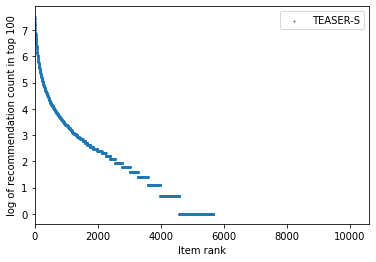

In [13]:
# evaluation.plot_long_tail(alg, Xtest_in=Xtest_in, Xtest_out=Xtest_out, labels=["EASE", "Test items"], k=100)
evaluation.plot_long_tail(alg, histories=Xtest_in, labels=["TEASER-S"], k=100)